# Python Image and Video Manipulation with FFmpeg

## Introduction 

FFmpeg is the preeminent command line video and image manipulator. In this tutorial, we will cover several useful tricks to add to your image and video-manipution toolchest.

## Documents

FFmpeg is not a package. Rather, it is an executable that can be accessed with your command line. The documentation for FFmpeg can be accessed [here](https://ffmpeg.org/documentation.html).

## Installation

Installing FFmpeg can be quite difficult. On a Mac, run "brew install ffmpeg" in a command line (or in a Jupyter Notebook run "!brew install ffmpeg").

On a Windows machine, the process is to install the ffmpeg executable, move it to your Program Files folder, and then add an environment variable to point at the executable's location. To do this, please follow the instructions in this Stack Exchange answer: https://video.stackexchange.com/questions/20495/how-do-i-set-up-and-use-ffmpeg-in-windows

For Linux users, follow the instructions at this link: https://www.gyan.dev/ffmpeg/builds/

You may be tempted to try to install ffmpeg with pip or conda. Do not do this. The conda package is too large, and the pip PyPl is not ffmpeg but rather a ffmpeg wrapper.

## Let's Generate a set of images and turn them into a video!

Import the Necessary packages to make a basic sin graph

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np

Let's generate some points

In [26]:
x_axis = np.linspace(0,2*math.pi, 100)
cosine = []
for item in x_axis:
    cosine.append(math.cos(item))

These points generate a graph that looks like this!

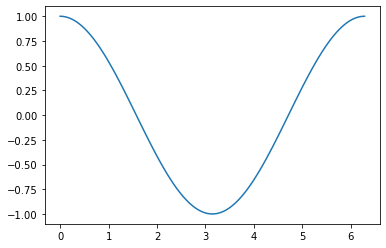

In [28]:
plt.plot(x_axis, cosine)

If you don't set x and y limits, the video graph won't look good as every point will be in the middle as in the image below. Try to generate the video with limits and without to see the difference.

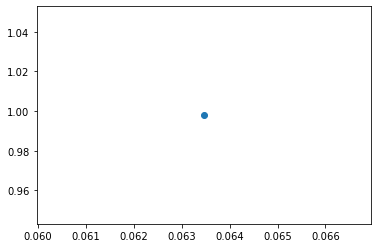

In [30]:
plt.scatter(x_axis[1], cosine[1])

Now you should make a new file in your current directory called Cosine_Graph_Images (or any other name you want) and save all of the images to this folder. 

In the loop we first set the limits, next we make a scatter plot, then save the image with a specific naming convention as in line 5. The naming convention is important for generating the video. Ours will be called image and then 3 numbers indicating the order we want to stitch the video together in. For example the first scatter plot will be called image000 and the next image001 and so on.

In [13]:
for i in range(len(cosine)):
    plt.xlim(x_axis[0] - .5, x_axis[99] + .5)
    plt.ylim(-1.25,1.25)
    plt.scatter(x_axis[0:i], cosine[0:i])
    plt.savefig(('Cosine_Graph_Images/' + 'image' + '{:03d}'.format(i) + '.png'))
    plt.clf()

<Figure size 432x288 with 0 Axes>

Next you should go to your command line and navigate your current directroy to the Sin_Graph_Images folder


Finally run this command 'ffmpeg -i image%03d.png video.avi' and it should generate a video!

# Naming Convention

If you have thousands of images change the {:03d} portion to {:04d} The number after the leading 0 indicates how many leading 0's are used in the saved image. So {:04d} would produce image0000, image0001, and so on.

# FrameRate

If you want to change the framerate include a -framerate x command where x is the desired framerate. You put this command immediately after ffmpeg

# Video Quality

If you want to change the video quality do -vf scale=width,height after you specify the naming convention of the images. for example -vf scale=1920,1080